In [112]:
#Herschel Cota
#assignment 4
#Winequality

In [50]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error

In [3]:
df=pd.read_csv("winequality-red.csv")

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
#preprocessing

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

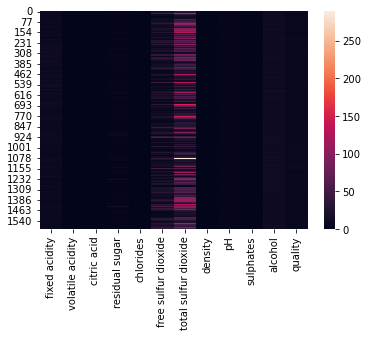

In [12]:
sns.heatmap(df)

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

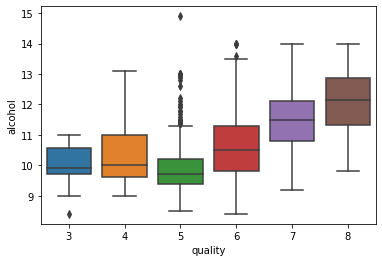

In [20]:
sns.boxplot(data=df,x=df['quality'],y=df['alcohol'])

In [21]:
#machine learning model building

In [22]:
x=df.drop('quality',axis=1)

In [23]:
y=df.quality

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [32]:
x_test.shape

(480, 11)

In [33]:
y_test.shape

(480,)

In [34]:
x_train.shape

(1119, 11)

In [36]:
lr=LinearRegression()

In [37]:
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred=lr.predict(x_test)

In [41]:
y_pred

array([5.92750637, 5.07161008, 5.54499769, 5.28175274, 4.99885554,
       5.84498999, 6.05646194, 5.04876076, 5.82279671, 5.33333549,
       5.3505915 , 6.49536733, 5.15151495, 5.27905524, 5.63872675,
       5.28366642, 5.67956117, 5.10408352, 5.85585012, 5.23873971,
       5.84592258, 4.98044723, 5.20029937, 5.33149229, 6.18267322,
       5.97661879, 5.86272988, 6.7578537 , 6.38169585, 5.27790846,
       5.48388828, 5.12545961, 4.90526271, 4.88573159, 5.68316122,
       6.27580241, 5.64232202, 5.10631306, 5.83032662, 5.41173822,
       6.11487212, 5.73425133, 6.14293471, 6.22012566, 5.26820447,
       5.07081079, 6.2993857 , 6.39854507, 5.39121571, 6.59995536,
       5.79211067, 5.56121408, 5.74236136, 5.27552978, 5.27916999,
       5.47019202, 5.18420858, 5.11517357, 5.27949028, 5.02859705,
       6.63708888, 5.64720982, 6.16133551, 6.36649719, 5.22885924,
       6.5714369 , 5.46374556, 6.37947148, 4.85892725, 5.908331  ,
       5.73402729, 5.17737155, 5.69751303, 5.04543101, 5.35857

In [43]:
y_test.shape

(480,)

In [44]:
y_pred.shape

(480,)

In [52]:
#evaluating model

In [53]:
mean_absolute_error(y_test,y_pred)

0.5147239728687785

In [54]:
r2_score(y_test,y_pred)

0.3199241726236025

In [55]:
mean_squared_error(y_test,y_pred)

0.4452341915174844

In [56]:
#testing with random values

In [59]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [61]:
#giving random values for columns

In [92]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
565,12.7,0.60,0.49,2.8,0.075,5.0,19.0,0.99940,3.14,0.57,11.4
219,7.8,0.53,0.33,2.4,0.080,24.0,144.0,0.99655,3.30,0.60,9.5
245,7.3,0.66,0.00,2.0,0.084,6.0,23.0,0.99830,3.61,0.96,9.9
1482,7.2,0.58,0.54,2.1,0.114,3.0,9.0,0.99719,3.33,0.57,10.3
860,7.2,0.62,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
...,...,...,...,...,...,...,...,...,...,...,...
101,7.8,0.50,0.30,1.9,0.075,8.0,22.0,0.99590,3.31,0.56,10.4
1474,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8
645,7.8,0.64,0.10,6.0,0.115,5.0,11.0,0.99840,3.37,0.69,10.1
512,10.7,0.40,0.48,2.1,0.125,15.0,49.0,0.99800,3.03,0.81,9.7


In [99]:
x=[7.6,0.5,0.2,4,0.05,16,80,0.99,3.5,0.8,9.3]
import numpy as np
x=np.array(x)

In [100]:
x.shape

(11,)

In [109]:
x=x.reshape(1,-1)
x.shape

(1, 11)

In [110]:
lr.predict(x)

C:\Users\bhavn\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.61411549])

In [111]:
#predicts a quality of 5.6